<a href="https://colab.research.google.com/github/facko28/Kelompok-6/blob/master/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [20]:
img = cv.imread('/content/drive/MyDrive/PCVK/UAS/berass.jpg')

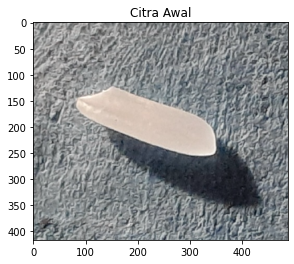

In [21]:
beras = cv.imread('/content/drive/MyDrive/PCVK/UAS/berass.jpg')
plt.title('Citra Awal')
plt.imshow(beras)
plt.show()

In [22]:
img

array([[[181, 181, 181],
        [192, 192, 192],
        [189, 189, 189],
        ...,
        [137, 142, 145],
        [123, 128, 131],
        [126, 131, 134]],

       [[186, 186, 186],
        [196, 196, 196],
        [194, 194, 194],
        ...,
        [155, 160, 163],
        [145, 150, 153],
        [142, 147, 150]],

       [[194, 194, 194],
        [201, 201, 201],
        [196, 196, 196],
        ...,
        [170, 175, 178],
        [171, 176, 179],
        [168, 173, 176]],

       ...,

       [[ 96, 100, 105],
        [ 89,  93,  98],
        [ 92,  97, 100],
        ...,
        [ 98, 103, 106],
        [ 96, 101, 104],
        [121, 126, 129]],

       [[ 98, 102, 107],
        [ 97, 101, 106],
        [105, 110, 113],
        ...,
        [100, 105, 108],
        [ 93,  98, 101],
        [121, 126, 129]],

       [[109, 116, 119],
        [110, 117, 120],
        [115, 120, 123],
        ...,
        [ 94, 100, 105],
        [ 99, 103, 108],
        [115, 119, 124]]

In [23]:
#menampilkan dimensi array gambar
img.shape

(417, 488, 3)

In [24]:
grayscale = []

for i in img :
    row = []
    for j in i :
        row.append((j[0]+j[1]+j[2])/3)
    grayscale.append(row)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


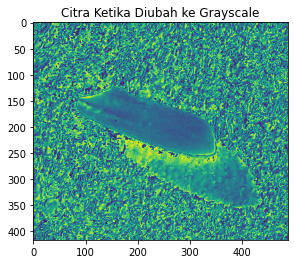

In [25]:
plt.title('Citra Ketika Diubah ke Grayscale')
plt.imshow(grayscale)
plt.show()

In [27]:
gsNp = np.array(grayscale)
h,w = np.shape(gsNp)
t=1 #initial condition
g1 = []
g2 = []

#calculating t by algorithm
while(1):
    for px in range(0,h):
        for py in range(0,w):
            if (gsNp[px][py] < t):
                g1.append(gsNp[px][py])
            else:
                g2.append(gsNp[px][py])
    mu1 = sum(g1) / len(g1)
#     print(g2)
    mu2 = sum(g2) / len(g2)
    t0=t
    t = ((mu1+ mu2)/2)
    delta_t = abs(t-t0)
#     print(mu1,mu2,t,delta_t)
    if(delta_t < 1):
        break
rata2 = round(t,0)
print(rata2)

35.0


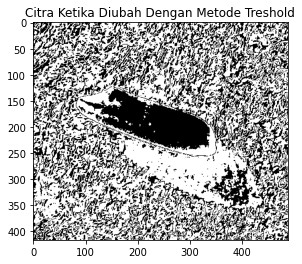

In [28]:
# thres_finder(img)
np.shape(gsNp)
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

setelahnya = global_threshold(gsNp,rata2,255,0)
plt.title('Citra Ketika Diubah Dengan Metode Treshold')
plt.imshow(setelahnya, cmap='gray', vmin=0, vmax=255)
plt.show()

In [30]:
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

In [31]:
hsv_img.shape

(417, 488, 3)

In [33]:
kebersihan = ""
for x in range(0,hsv_img.shape[0]):
    for y in range(0, hsv_img.shape[1]):
        if (hsv_img[x,y,1] < 0.4) and (hsv_img[x,y,2] > 0.55):
            kebersihan = "Bersih"
        else:
            kebersihan = "Tidak Bersih"

In [34]:
kebersihan

'Tidak Bersih'

In [36]:
warna = ""
for x in range(0,hsv_img.shape[0]):
    for y in range(0, hsv_img.shape[1]):
        if (hsv_img[x,y,0] > 0.2 and hsv_img[x,y,0] < 0.7) and (hsv_img[x,y,1] > 0.01 and hsv_img[x,y,1] < 0.3) and (hsv_img[x,y,2] > 0.55 and hsv_img[x,y,2] < 0.9):
            warna = "Putih"
        else:
            warna = "Tidak Putih"

In [37]:
warna

'Tidak Putih'

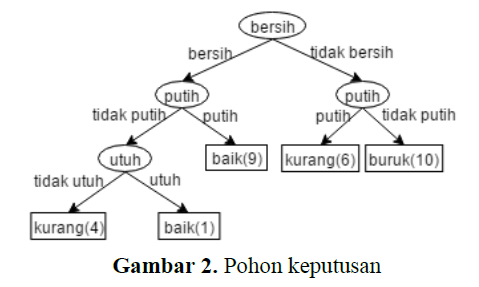

In [38]:
if kebersihan == "Bersih":
    if warna == "Putih":
        print("Baik")
    else:
        print("Kurang")
else:
    if warna == "Putih":
        print("Kurang")
    else:
        print("Buruk")

Buruk
